<a id="table"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Importing libraries</h1>

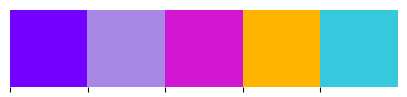

In [1]:
import warnings

import matplotlib.pyplot as plt
import missingno as mn
import numpy as np
import pandas as pd
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
from tqdm import tqdm

init_notebook_mode(connected=True)
import seaborn as sns
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn import metrics
from sklearn.model_selection import (
    KFold,
    RepeatedKFold,
    RepeatedStratifiedKFold,
    StratifiedKFold,
)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

pd.set_option("display.max_columns", 50)
warnings.filterwarnings("ignore")
# warnings.filterwarnings("ignore", category="FutureWarning")
# warnings.filterwarnings("ignore", category="DeprecationWarning")
# warnings.filterwarnings("ignore", category="UserWarning")

# Color Palette
custom_colors = ["#7400ff", "#a788e4", "#d216d2", "#ffb500", "#36c9dd"]
sns.palplot(sns.color_palette(custom_colors))

# Set Style
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)

# Set tick size
plt.rc("xtick", labelsize=12)
plt.rc("ytick", labelsize=12)

<a id="table"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Reading Data Files</h1>

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
ss = pd.read_csv("sample_submission.csv")

In [3]:
train.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [4]:
test.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [5]:
ss.head()

,id,booking_status
0,42100,0.392
1,42101,0.392
2,42102,0.392
3,42103,0.392
4,42104,0.392


<AxesSubplot:xlabel='lead_time', ylabel='Count'>

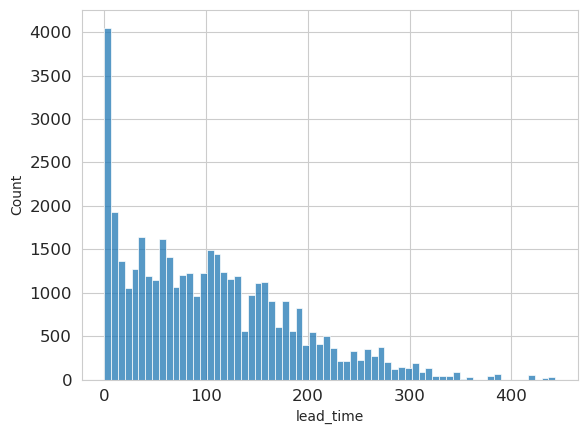

In [7]:
sns.histplot(train["lead_time"])

In [ ]:
sns.

## Distribution of the target variable

<AxesSubplot:>

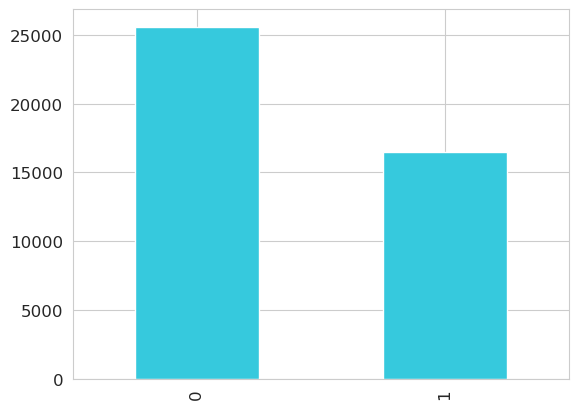

In [6]:
train["booking_status"].value_counts().plot(kind="bar", color=custom_colors[4])

<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:#AF65C1;
       font-size:150%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">
        <b>Statiscal overview of the data</b>
    </p>
</div>

In [7]:
train.describe().T.style.bar(
    subset=["mean"], color=custom_colors[4]
).background_gradient(subset=["std"], cmap="Reds").background_gradient(
    subset=["50%"], cmap="coolwarm"
)

,count,mean,std,min,25%,50%,75%,max
id,42100.000000,21049.500000,12153.367503,0.000000,10524.750000,21049.500000,31574.250000,42099.000000
no_of_adults,42100.000000,1.920713,0.524950,0.000000,2.000000,2.000000,2.000000,4.000000
no_of_children,42100.000000,0.141093,0.450128,0.000000,0.000000,0.000000,0.000000,9.000000
no_of_weekend_nights,42100.000000,0.884632,0.885693,0.000000,0.000000,1.000000,2.000000,7.000000
no_of_week_nights,42100.000000,2.398005,1.427330,0.000000,1.000000,2.000000,3.000000,17.000000
type_of_meal_plan,42100.000000,0.239192,0.587674,0.000000,0.000000,0.000000,0.000000,3.000000
required_car_parking_space,42100.000000,0.025249,0.156884,0.000000,0.000000,0.000000,0.000000,1.000000
room_type_reserved,42100.000000,0.428931,0.832605,0.000000,0.000000,0.000000,1.000000,6.000000
lead_time,42100.000000,103.888029,81.069343,0.000000,37.000000,93.000000,155.000000,443.000000
arrival_year,42100.000000,2017.856295,0.350795,2017.000000,2018.000000,2018.000000,2018.000000,2018.000000


<a id="table"></a>
# <h2 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Distribution of each features</h2>

<Figure size 640x480 with 0 Axes>

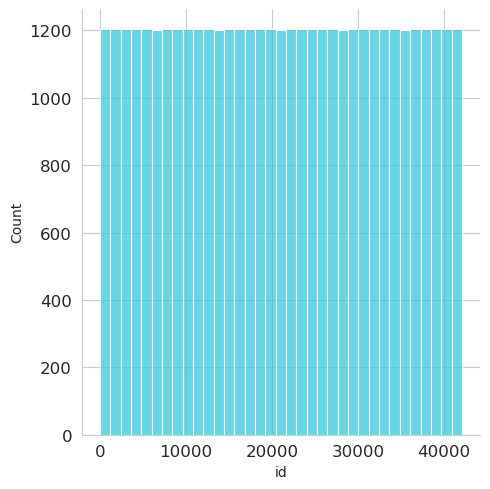

<Figure size 640x480 with 0 Axes>

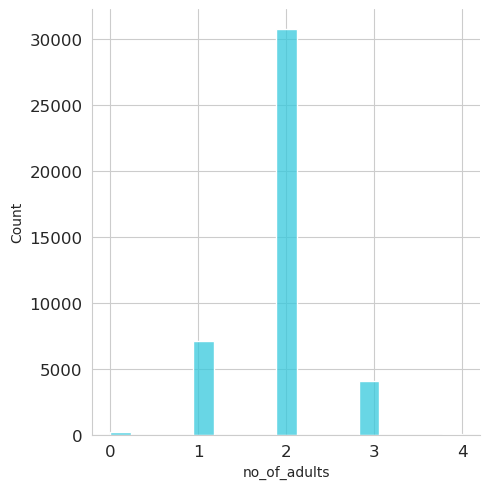

<Figure size 640x480 with 0 Axes>

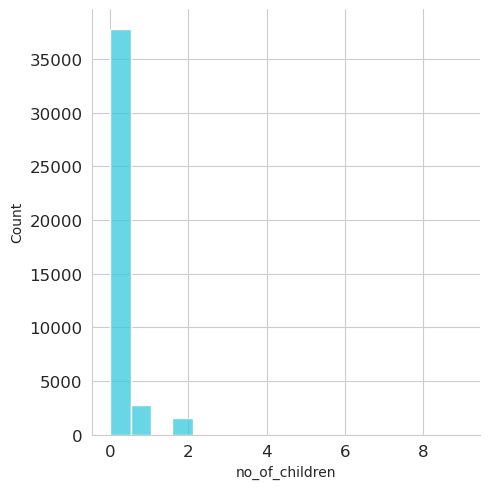

<Figure size 640x480 with 0 Axes>

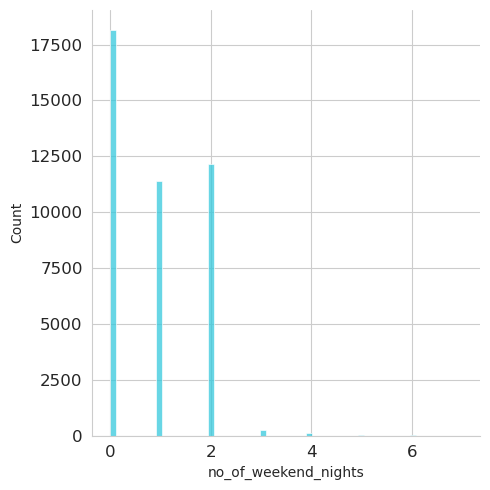

<Figure size 640x480 with 0 Axes>

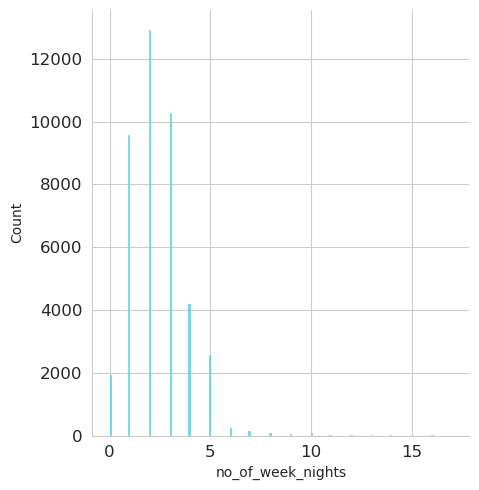

<Figure size 640x480 with 0 Axes>

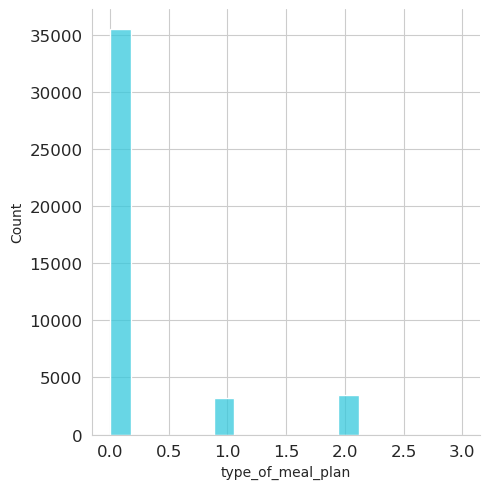

<Figure size 640x480 with 0 Axes>

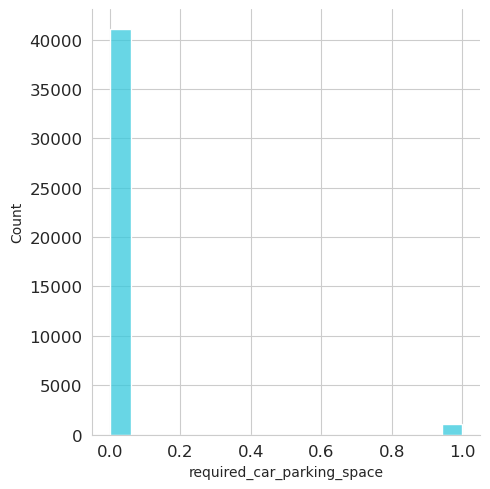

<Figure size 640x480 with 0 Axes>

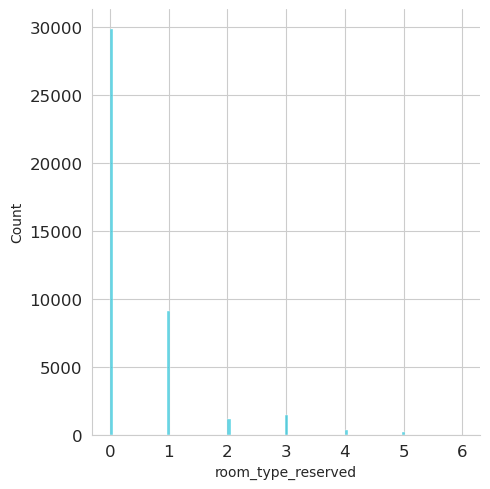

<Figure size 640x480 with 0 Axes>

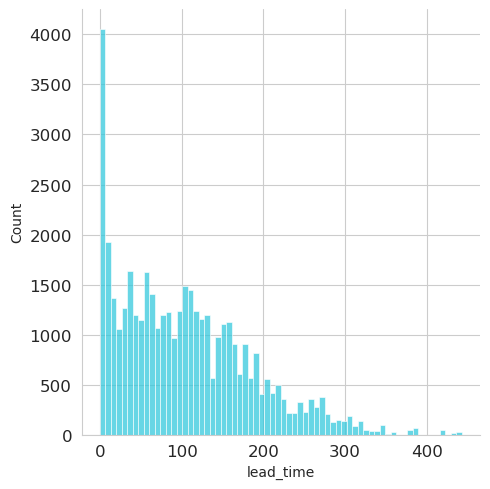

<Figure size 640x480 with 0 Axes>

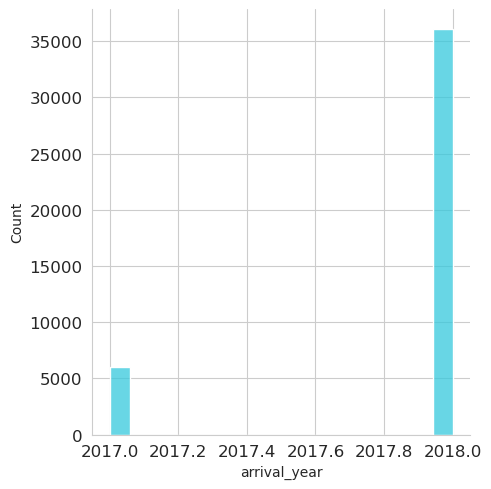

<Figure size 640x480 with 0 Axes>

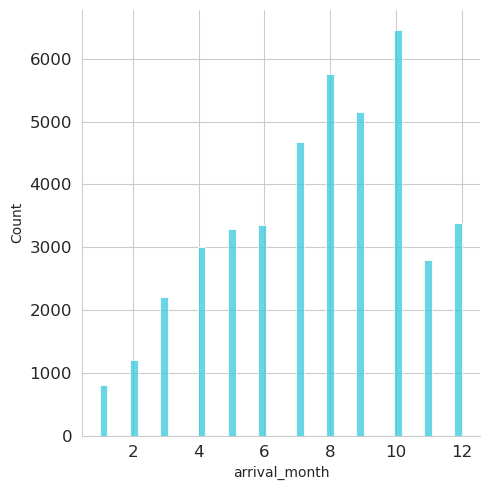

<Figure size 640x480 with 0 Axes>

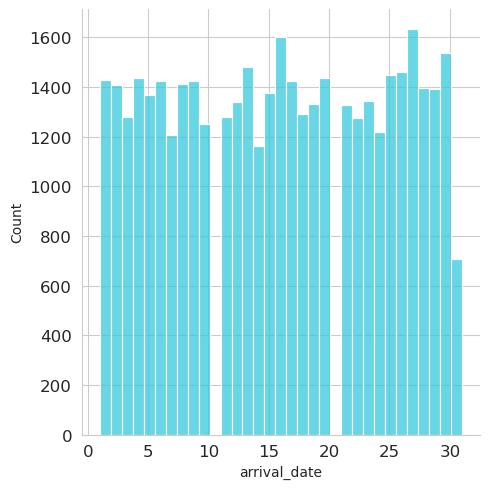

<Figure size 640x480 with 0 Axes>

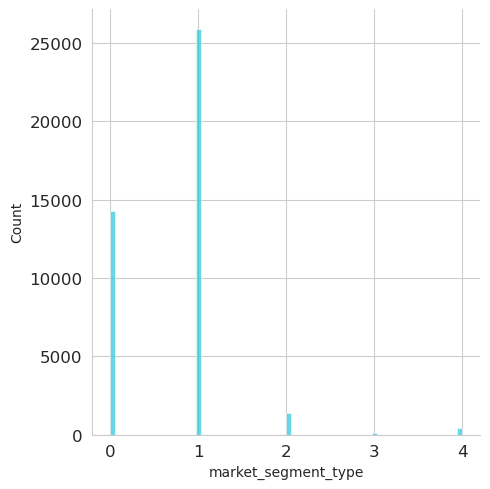

<Figure size 640x480 with 0 Axes>

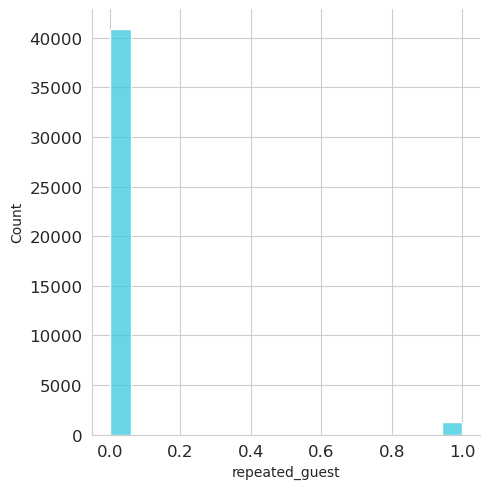

<Figure size 640x480 with 0 Axes>

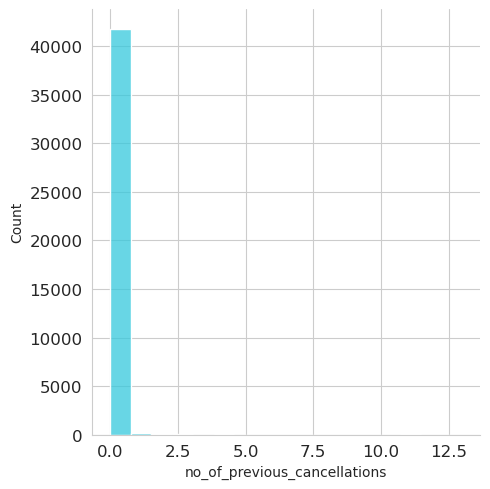

<Figure size 640x480 with 0 Axes>

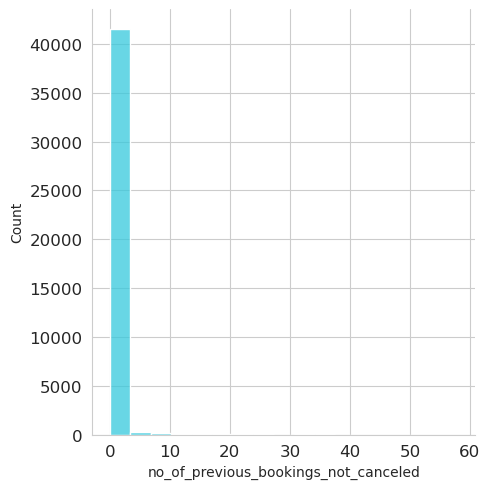

<Figure size 640x480 with 0 Axes>

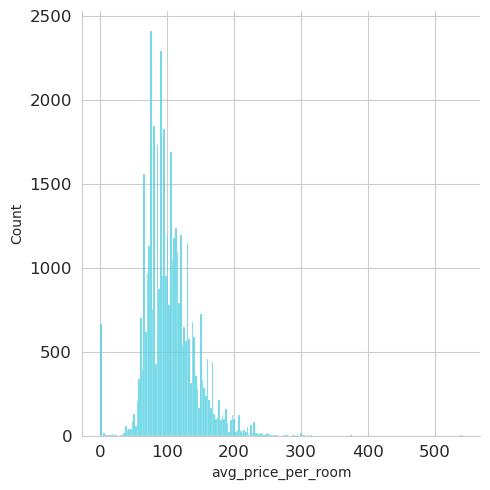

<Figure size 640x480 with 0 Axes>

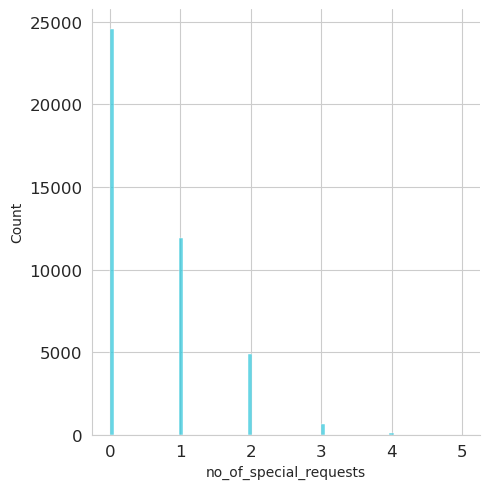

<Figure size 640x480 with 0 Axes>

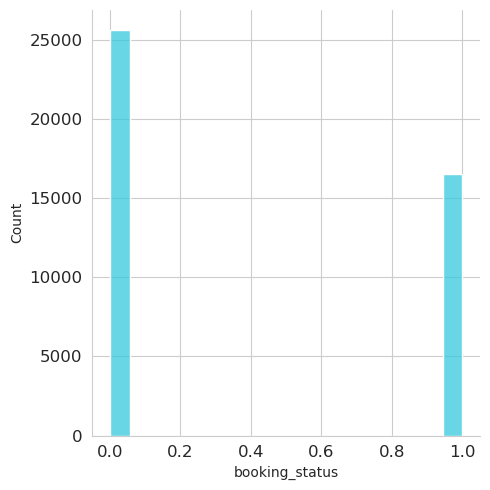

In [8]:
## Distributions of all numerical features
# Use a for loop to create a distribution for each feature
for feature in train.columns.to_list():
    plt.figure()
    sns.displot(
        x=feature,
        data=train,
        color=custom_colors[4],
    )
    plt.show()

From the above graphs we can see that most of our features doesn't look like a normal distribution except the **average_price_per_room** which look a bit like that.</br>
we can see also that most of our features are discrite which mean that they are having values within as specific range.






<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:#59729F;
       font-size:110%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">
       From the above graphs we can see that most of our features doesn't look like a normal distribution except the **average_price_per_room** which look a bit like that.<br>
We can see also that most of our features are discrite which mean that they are having values within as specific range.<br>
    </p>
</div>


In [9]:
X = train.drop(["id", "booking_status", "no_of_previous_cancellations"], axis=1)
y = train["booking_status"]
test = test.drop(["id", "no_of_previous_cancellations"], axis=1)

<a id="table"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Model Building using Cross validation</h1>

In [18]:
params = {
    "boosting_type" "subsample": 0.7,
    "reg_lambda": 0.0,
    "reg_alpha": 1.0,
    "num_leaves": 30,
    "n_estimators": 700,
    "min_child_samples": 5,
    "max_depth": 3,
    "learning_rate": 0.1,
    "colsample_bytree": 0.7,
}

In [22]:
%%time
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=55)

preds = []
scores = []
feature_importance_df = pd.DataFrame()

for fold, (idx_train, idx_valid) in enumerate(kf.split(X, y)):
    X_train, y_train = X.iloc[idx_train], y.iloc[idx_train]
    X_valid, y_valid = X.iloc[idx_valid], y.iloc[idx_valid]

    model = CatBoostClassifier(
        use_best_model=True, verbose=0, bootstrap_type="Bayesian"
    )
    # model = LGBMClassifier(**params)

    model.fit(
        X_train,
        y_train,
        eval_set=[(X_valid, y_valid)],
        verbose=False,
        early_stopping_rounds=100,
    )

    pred_valid = model.predict_proba(X_valid)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_valid, pred_valid)
    score = metrics.auc(fpr, tpr)
    scores.append(score)

    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = X.columns
    fold_importance_df["importance"] = model.feature_importances_
    fold_importance_df["fold"] = fold + 1
    feature_importance_df = pd.concat(
        [feature_importance_df, fold_importance_df], axis=0
    )

    print(f"Fold: {fold + 1} Score: {score}" "\n")
    print("||" * 40, "\n")

    test_preds = model.predict_proba(test)[:, 1]
    preds.append(test_preds)

print(f"Overall Validation Score: {np.mean(scores)}")

Fold: 1 Score: 0.8926876183712121

|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||| 

Fold: 2 Score: 0.9009376183712121

|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||| 

Fold: 3 Score: 0.8955562263257575

|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||| 

Fold: 4 Score: 0.8929026988636365

|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||| 

Fold: 5 Score: 0.9061680871212121

|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||| 

Fold: 6 Score: 0.8878123816287878

|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||| 

Fold: 7 Score: 0.9034286892333065

|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||| 

Fold: 8 Score: 0.9008756164925682

|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||| 

Fold: 9 Score: 0.8925336616717663

|||||||||||||||||||||

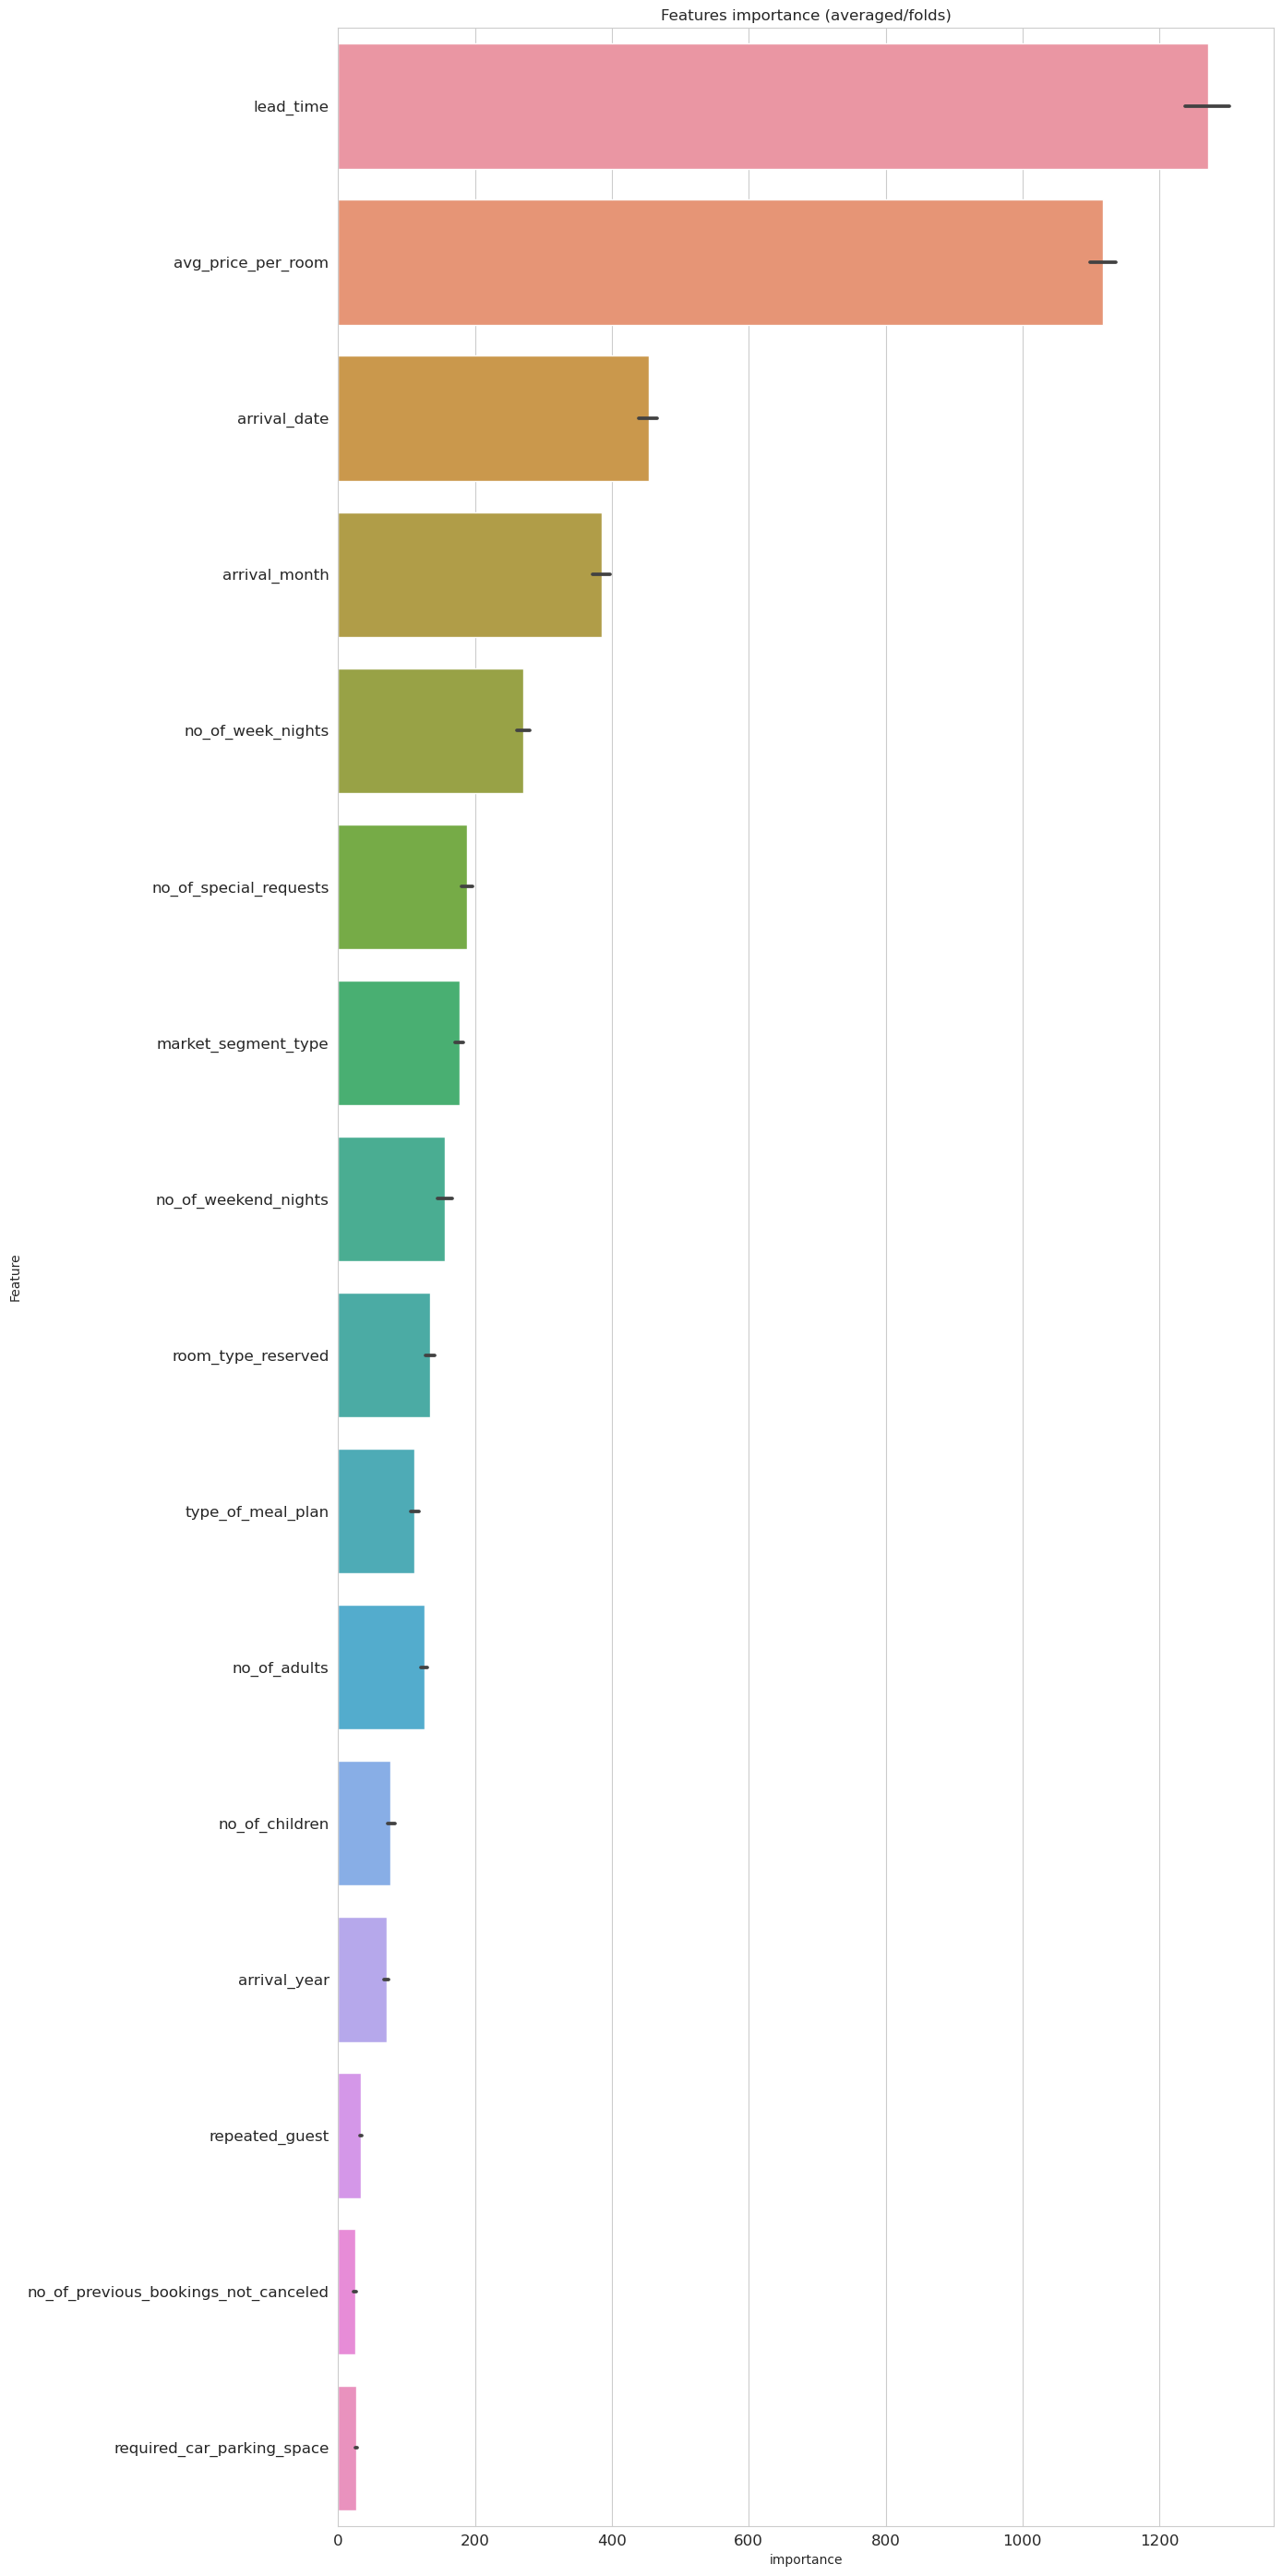

In [12]:
cols = (
    feature_importance_df[["Feature", "importance"]]
    .groupby("Feature")
    .mean()
    .sort_values(by="importance", ascending=False)[:107]
    .index
)
best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(14, 28))
sns.barplot(
    x="importance",
    y="Feature",
    data=best_features.sort_values(
        by="importance",
        ascending=False,
    ),
)
plt.title("Features importance (averaged/folds)")
plt.tight_layout()
# plt.savefig("FI.png")

<a id="table"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Making Submission file</h1>

In [13]:
predictions = np.mean(np.column_stack(preds), axis=1)

ss["booking_status"] = predictions
ss.to_csv("./cb.csv", index=False)
ss.head()

,id,booking_status
0,42100,0.078985
1,42101,0.087095
2,42102,0.361077
3,42103,0.039269
4,42104,0.411039


In [14]:
jk

NameError: name 'jk' is not defined

<a id="table"></a>
# <h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Hyperparameter turning using optuna</h1>

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV

# Create LightGBM classifier
clf = lgb.LGBMClassifier()

# Define parameter distribution to sample from
param_dist = {
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3],
    "n_estimators": [500, 700, 900, 1000, 3000],
    "num_leaves": [10, 20, 30, 40],
    "max_depth": [3, 4, 5, 6, 7, 9],
    "min_child_samples": [5, 10, 15, 20],
    "subsample": [0.6, 0.7, 0.8, 0.9],
    "colsample_bytree": [0.6, 0.7, 0.8, 0.9],
    "reg_alpha": [0.0, 0.1, 0.3, 0.5, 1.0],
    "reg_lambda": [0.0, 0.1, 0.3, 0.5, 1.0],
}

# Perform randomized search
search = RandomizedSearchCV(
    clf,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring="roc_auc",
    verbose=10,
    n_jobs=-1,
    random_state=42,
)

# Fit the search to the data
search.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters: ", search.best_params_)
print("Best score: ", search.best_score_)

In [ ]:
import sklearn

In [ ]:
sklearn.metrics.get_scorer_names()

In [ ]:
import catboost as cb
import optuna
from optuna.integration import CatBoostPruningCallback
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


def objective(trial: optuna.Trial) -> float:
    train_x, valid_x, train_y, valid_y = train_test_split(X, y, test_size=0.25)

    param = {
        "objective": trial.suggest_categorical(
            "objective", ["Logloss", "CrossEntropy"]
        ),
        "learning_rate": trial.suggest_categorical(
            "learning_rate", [0.006, 0.008, 0.01, 0.014, 0.017, 0.02, 0.1]
        ),
        "colsample_bylevel": trial.suggest_float(
            "colsample_bylevel", 0.01, 0.1, log=True
        ),
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical(
            "boosting_type", ["Ordered", "Plain"]
        ),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
        ),
        "used_ram_limit": "3gb",
        "eval_metric": "Accuracy",
        "n_estimators": trial.suggest_int("n_estimators", 1, 10000),
    }

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1, log=True)

    gbm = cb.CatBoostClassifier(**param)

    pruning_callback = CatBoostPruningCallback(trial, "Accuracy")
    gbm.fit(
        train_x,
        train_y,
        eval_set=[(valid_x, valid_y)],
        verbose=0,
        early_stopping_rounds=100,
        callbacks=[pruning_callback],
    )

    # evoke pruning manually.
    pruning_callback.check_pruned()

    preds = gbm.predict(valid_x)
    pred_labels = np.rint(preds)
    accuracy = accuracy_score(valid_y, pred_labels)

    return accuracy


if __name__ == "__main__":
    study = optuna.create_study(
        pruner=optuna.pruners.MedianPruner(n_warmup_steps=5), direction="maximize"
    )
    study.optimize(objective, n_trials=100, timeout=600)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))